# Visualizing Hidden Layers

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ[:,0] >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4)


In [3]:
df = pd.read_csv('../data/geoloc_elev.csv')

# we only use the 2 features that matter
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

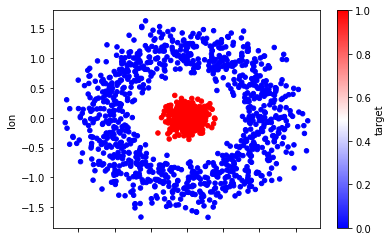

In [4]:
# we are using notebook interactive plotting.
# make sure to snap the plot to the notebook before proceeding
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [7]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 351us/step - loss: 0.6492 - acc: 0.6413 - val_loss: 0.6509 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 111us/step - loss: 0.6186 - acc: 0.6582 - val_loss: 0.5946 - val_acc: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 124us/step - loss: 0.5057 - acc: 0.7344 - val_loss: 0.4137 - val_acc: 0.8762
Epoch 4/20
945/945 [==============================] - 0s 118us/step - loss: 0.2574 - acc: 0.9714 - val_loss: 0.1286 - val_acc: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 117us/step - loss: 0.0799 - acc: 0.9989 - val_loss: 0.0474 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 112us/step - loss: 0.0356 - acc: 1.0000 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 121us/step - loss: 0.0217 - acc: 1.0000 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 8/20
945/9

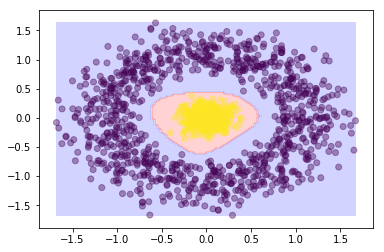

In [7]:
# we are using notebook interactive plotting.
# make sure to snap the plot to the notebook before proceeding
plot_decision_boundary(model, X, y)

## Representation Learning: inspecting the output of the hidden layer

In [20]:
model.layers

In order to extract the activations at the hidden layer from Keras, we can [create a function](http://keras.io/getting-started/faq/#how-can-i-visualize-the-output-of-an-intermediate-layer) where we specify what layer we would like to "extract" the value of like so:

In [21]:
from keras import backend as K

In [22]:
input_t = model.layers[0].input

In [23]:
inner_t = model.layers[1].output

In [24]:
get_hidden_layer_output = K.function([input_t], [inner_t])

In [25]:
get_hidden_layer_output

In [26]:
H = get_hidden_layer_output([X_test])[0]

H.shape

(450, 3)

In [27]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# A helper function to make a 3d scatter plot
def plot_3d_representation(X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y, alpha=0.2)
    ax.view_init(60, 30)

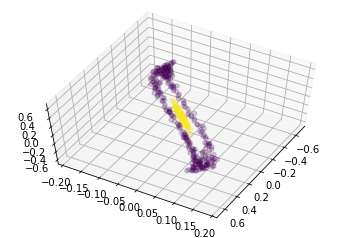

In [29]:
plot_3d_representation(H, y_test)

What do you see? Are the classes linearly separable now? Discuss what you think is happening with a partner or instructor.

## Exercise 1

- Reset the above model to random weights and inspect the hidden layer representation
- Are the two classes well separated without training?

## Execise 2

Let's separate two True from False banknotes and look how the model learns the inner representation.

- Load the `../data/banknotes.csv` dataset into a pandas dataframe
- Inspect it using Seaborn Pairplot
- Separate features from labels. Labels are contained in the `class` column
- Split data into train and test sets, using a 30% test size and random_state=42
- Create a model with the following architecture:
        Input: 4 features
        Inner layer: 2 nodes, relu activation
        Output layer: 1 node, sigmoid

- Compile the model
- Set the model weights to the initial weights provided below using `model.set_weights`
- Train the model one epoch at a time, and at each epoch visualize the test data as it appears at the output of the inner layer `model.layers[0].output` on a 2D scatter plot.

You should see model gradually learn to separate the 2 classes.

In [18]:
weights = [np.array([[-0.26285839,  0.82659411],
                     [ 0.65099144, -0.7858932 ],
                     [ 0.40144777, -0.92449236],
                     [ 0.87284446, -0.59128475]]),
           np.array([ 0.,  0.]),
           np.array([[-0.7150408 ], [ 0.54277754]]),
           np.array([ 0.])]